In [1]:
from myfuncs import *

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

Run experiments to collect effective area results:

===================  ===================
number of output points= 60000
=================== LTTBETDownsampler ===================
LTTBETDownsampler area= 97614765.5
number of output points= 320
=================== LTTBETFurtherDownsampler ===================
LTTBETFurtherDownsampler effective area of all iterations [9.76147655e+07 1.02955854e+08 1.03180223e+08 1.03411492e+08
 1.03411493e+08 1.03411493e+08 1.03411493e+08 1.03411493e+08]
number of output points= 320
=================== MinMaxLTTB2Downsampler ===================
MinMaxFPLPDownsampler area= 62418602.5
LTTBETDownsampler area= 97146405.0
number of output points= 311
=================== MinMaxFPLPDownsampler ===================
MinMaxFPLPDownsampler area= 92602561.5
number of output points= 320
=================== M4Downsampler ===================
M4Downsampler area= 80773730.5
number of output points= 318
===================  ===================
number of output points= 60000
=================== LTTBETDownsampler ===========

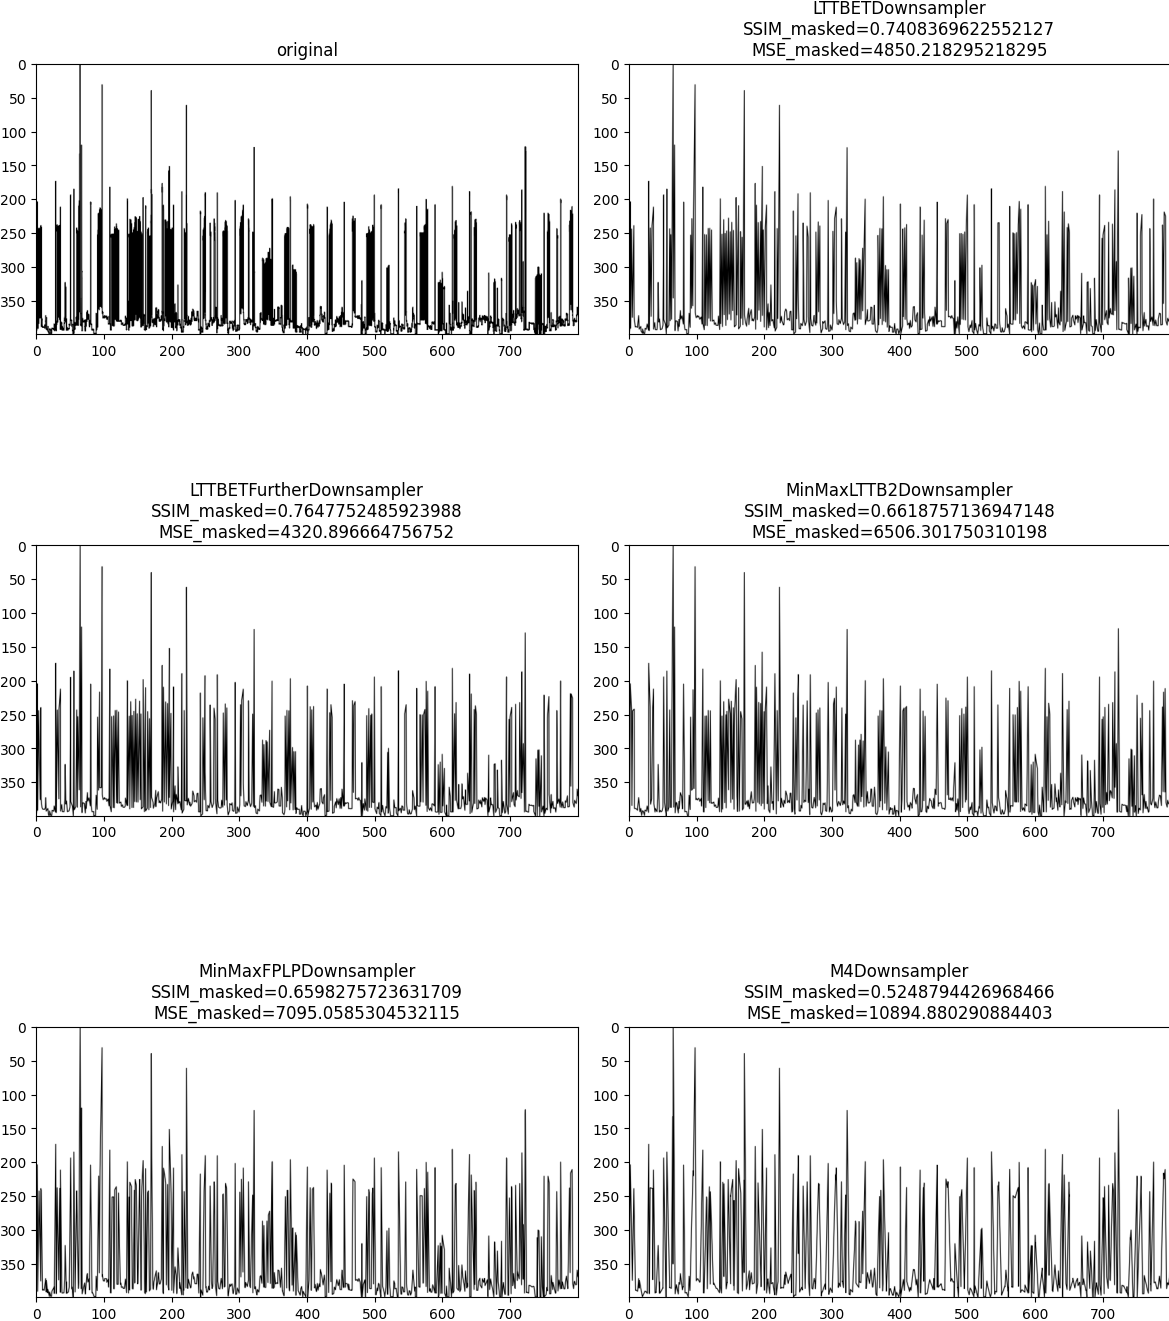

finish


In [2]:
# dataset
d1="..\\datasets\\FreezerRegularTrain_TEST.csv"
d2="..\\datasets\\HouseTwenty_TEST.csv"
d3="..\\datasets\\Lightning7_TEST.csv"
d4="..\\datasets\\Mallat_TEST.csv"
d5="..\\datasets\\OliveOil_TEST.csv"
d6="..\\datasets\\Wine_TEST.csv"

dList=[d2]

for i in range(len(dList)):
    filename = dList[i]
    df=pd.read_csv(filename,header=None)
    t=df.iloc[:,0]
    v=df.iloc[:,1]
    t=t.to_numpy()
    v=v.to_numpy()

    fig, axs = plt.subplots(3,2,figsize=(12, 15))

    # anti=False
    # lw=0.5
    # height=250

    anti=True
    lw=0.5
    width=800
    height=400
    gridVertical=False
    gridHorizontal=False
    noutArray=[320,360,400,440,480,520,560,600,640]

    rps=2

    res="res-{}-{}.csv".format(filename.split("\\")[-1].split(".")[0], rps)

    with open(res, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["nout",\
                "lttb_n","lttb_ssim","lttb_mse",\
                "ilts_n","ilts_ssim","ilts_mse",\
                "minmaxlttb_n","minmaxlttb_ssim","minmaxlttb_mse",\
                "minmax_n","minmax_ssim","minmax_mse",\
                "m4_n","m4_ssim","m4_mse"])

        for i in range(len(noutArray)):
            nout=noutArray[i]

            row=[nout]

            name='original'
            downsample=_
            ax = axs[0,0];plt.sca(ax);
            gridStep=width/nout
            subplt_myplot_external(width,height,96*2,name,anti,downsample,_,lw,gridStep,t,v,gridVertical,gridHorizontal)
            ax.set_title(name)

            name='LTTBETDownsampler' 
            downsample='LTTBETDownsampler'
            ax = axs[0,1];plt.sca(ax);
            gridStep=width/(nout-2)
            t2,v2=subplt_myplot_external(width,height,96*2,name,anti,downsample,nout,lw,gridStep,t,v,gridVertical,gridHorizontal)
            f1='original.png'
            f2=name+'.png'
            ax.set_title("{}\nSSIM_masked={}\nMSE_masked={}".format(name,match_masked(f1,f2),mse_in_255_masked(f1,f2)))
            row.append(len(t2))
            row.append(match_masked(f1,f2))
            row.append(mse_in_255(f1,f2))

            name='LTTBETFurtherDownsampler' 
            downsample='LTTBETFurtherDownsampler'
            ax = axs[1,0];plt.sca(ax);
            gridStep=width
            t3,v3=subplt_myplot_external(width,height,96*2,name,anti,downsample,nout,lw,gridStep,t,v,gridVertical,gridHorizontal)
            f1='original.png'
            f2=name+'.png'
            ax.set_title("{}\nSSIM_masked={}\nMSE_masked={}".format(name,match_masked(f1,f2),mse_in_255_masked(f1,f2)))
            row.append(len(t3))
            row.append(match_masked(f1,f2))
            row.append(mse_in_255(f1,f2))

            name='MinMaxLTTB{}Downsampler'.format(rps)
            downsample='MinMaxLTTB{}Downsampler'.format(rps)
            ax = axs[1,1];plt.sca(ax);
            gridStep=width
            t4,v4,t4_pre,v4_pre=subplt_myplot_external(width,height,96*2,name,anti,downsample,nout,lw,gridStep,t,v,gridVertical,gridHorizontal)
            f1='original.png'
            f2=name+'.png'
            ax.set_title("{}\nSSIM_masked={}\nMSE_masked={}".format(name,match_masked(f1,f2),mse_in_255_masked(f1,f2)))
            row.append(len(t4))
            row.append(match_masked(f1,f2))
            row.append(mse_in_255(f1,f2))

            name='MinMaxFPLPDownsampler'
            downsample='MinMaxFPLPDownsampler'
            ax = axs[2,0];plt.sca(ax);
            gridStep=width
            t8,v8=subplt_myplot_external(width,height,96*2,name,anti,downsample,nout,lw,gridStep,t,v,gridVertical,gridHorizontal)
            f1='original.png'
            f2=name+'.png'
            ax.set_title("{}\nSSIM_masked={}\nMSE_masked={}".format(name,match_masked(f1,f2),mse_in_255_masked(f1,f2)))
            row.append(len(t8))
            row.append(match_masked(f1,f2))
            row.append(mse_in_255(f1,f2))

            name='M4Downsampler'
            downsample='M4Downsampler'
            ax = axs[2,1];plt.sca(ax);
            gridStep=width
            t9,v9=subplt_myplot_external(width,height,96*2,name,anti,downsample,nout,lw,gridStep,t,v,gridVertical,gridHorizontal)
            f1='original.png'
            f2=name+'.png'
            ax.set_title("{}\nSSIM_masked={}\nMSE_masked={}".format(name,match_masked(f1,f2),mse_in_255_masked(f1,f2)))
            row.append(len(t9))
            row.append(match_masked(f1,f2))
            row.append(mse_in_255(f1,f2))

            writer.writerow(row)

    plt.tight_layout()
    plt.show()

    print('finish')

Plot results:

C:\Users\admin\AppData\Local\Temp\ipykernel_22604\2271993733.py:162: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


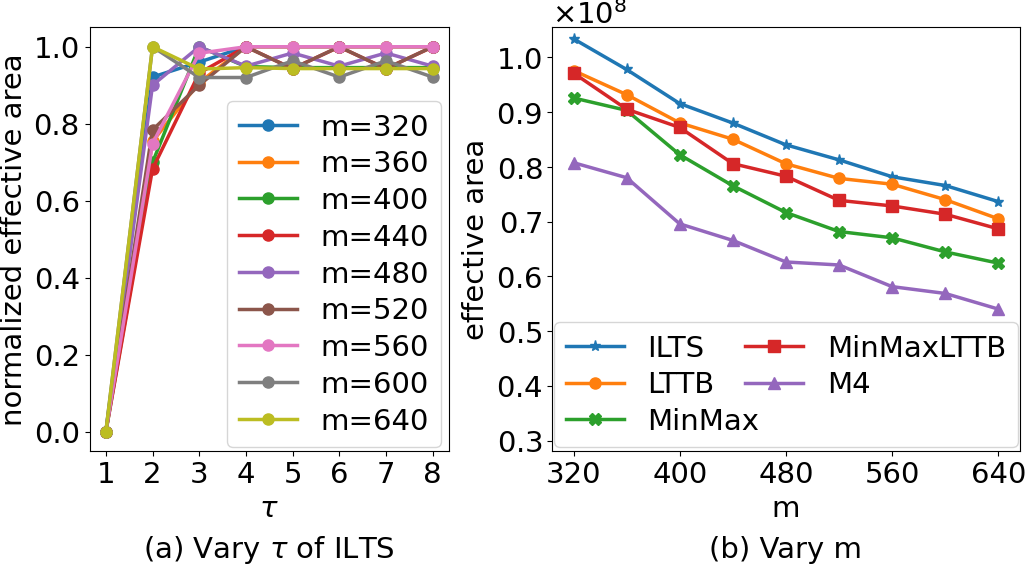

In [3]:
from rdp import rdp
# import visvalingamwyatt as vw # 有bug
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from csv import reader
import math
from scipy import signal
from tsdownsample import M4Downsampler,EveryNthDownsampler,LTTBDownsampler,LTOBDownsampler,\
    MinMaxDownsampler,LTDDownsampler,LTDOBDownsampler,LTOBETDownsampler,LTTBETDownsampler,\
    LTTBETGapDownsampler,LTOBETGapDownsampler,MinMaxGapDownsampler,LTTBETNewDownsampler,\
    LTTBETFurtherDownsampler,MinMaxFPLPDownsampler,LTSDownsampler,ILTSParallelDownsampler
import cv2
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float
from skimage.metrics import mean_squared_error
import cv2
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float
from skimage.metrics import mean_squared_error
from skimage.util import invert 
from matplotlib.ticker import AutoMinorLocator, FixedLocator
from matplotlib import image as mpimg
from PIL import Image
from matplotlib.transforms import IdentityTransform
import random
import scipy.ndimage as ndi
from textwrap import wrap
from matplotlib.ticker import ScalarFormatter

fig, axs = plt.subplots(1,2,figsize=(12,5.5),gridspec_kw={'width_ratios': [1,1.3]})
ax1=axs[0]
ax2=axs[1]


# Remove space between axes
fig.subplots_adjust(wspace=0.25)

font=21
lw=2.5
slw=1
ms=8
titlepos=-0.27

noutArray=[320,360,400,440,480,520,560,600,640]
maxArea=[]

#########################################
plt.sca(ax1)

a="9.76147655e+07 1.02955854e+08 1.03180223e+08 1.03411492e+08 \
 1.03411493e+08 1.03411493e+08 1.03411493e+08 1.03411493e+08"
b=np.array([float(x) for x in a.split()])
maxArea.append(b[-1])
b=(b-min(b))/(max(b)-min(b))
plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=320")

a="93208486.5 96673087.5 97376479.5 97803364.  97803562.  97803562.\
 97803562.  97803562. "
b=np.array([float(x) for x in a.split()])
maxArea.append(b[-1])
b=(b-min(b))/(max(b)-min(b))
plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=360")

a="88049413.  90661186.5 91782099.5 91589700.  91579637.5 91579637.5 \
 91579637.5 91579637.5"
b=np.array([float(x) for x in a.split()])
maxArea.append(b[-1])
b=(b-min(b))/(max(b)-min(b))
plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=400")

a="85063313.  87081485.  87817056.5 88019380.5 87851732.  88017635.\
 87851732.  88017635."
b=np.array([float(x) for x in a.split()])
maxArea.append(b[-1])
b=(b-min(b))/(max(b)-min(b))
plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=440")

a="80575926.  83856856.5 84220944.  84037003.5 84161750.5 84037003.5 \
 84161750.5 84037003.5"
b=np.array([float(x) for x in a.split()])
maxArea.append(b[-1])
b=(b-min(b))/(max(b)-min(b))
plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=480")

a="77906662.5 80562042.5 80956001.  81293924.  81100002.5 81293924.\
 81100002.5 81293924. "
b=np.array([float(x) for x in a.split()])
maxArea.append(b[-1])
b=(b-min(b))/(max(b)-min(b))
plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=520")

a="76841750.5 77863347.5 78184186.  78207167.5 78207167.5 78207167.5 \
 78207167.5 78207167.5"
b=np.array([float(x) for x in a.split()])
maxArea.append(b[-1])
b=(b-min(b))/(max(b)-min(b))
plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=560")

a="74023826.5 76826059.5 76602053.5 76602112.5 76723473.5 76605108.5 \
 76723473.5 76605108.5"
b=np.array([float(x) for x in a.split()])
maxArea.append(b[-1])
b=(b-min(b))/(max(b)-min(b))
plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=600")

a="70526462. 73853804. 73661113. 73673294. 73665028. 73665028. 73665028. \
 73665028."
b=np.array([float(x) for x in a.split()])
maxArea.append(b[-1])
b=(b-min(b))/(max(b)-min(b))
plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=640")

# plt.ylim(-0.1,1.05)

plt.xticks(fontsize=font)
plt.yticks(fontsize=font)

plt.xlabel(r"$\tau$",fontsize=font)
plt.ylabel("normalized effective area", fontsize=font) # normalized to compare different nout?

plt.legend(fontsize=font,ncol=1,bbox_to_anchor=(0.68,0.86), loc='upper center',columnspacing=0.2,labelspacing = 0.3)
plt.title(r'(a) Vary $\tau$ of ILTS',y=titlepos,fontsize=font)
    
########################################
plt.sca(ax2)

lttbArea=[97614765.5,93208486.5,88049413.0,85063313.0,80575926.0,77906662.5,76841750.5,74023826.5,70526462.0]
minmaxlttbArea=[97146405.0,90551619.5,87210944.5,80597796.0,78298218.0,73891839.0,72870823.5,71354564.0,68686737.0]
minmaxArea=[92602561.5,90332728.5,82228959.0,76557241.0,71671306.5,68194817.5,67046323.5,64473527.5,62418602.5]
m4Area=[80773730.5,78031639.5,69596523.5,66568018.5,62631863.5,62083594.5,58125624.5,56881112.5,54024708.0]

plt.plot(noutArray,maxArea,marker='*',markersize=ms,linewidth=lw,color='tab:blue',label="ILTS")
plt.plot(noutArray,lttbArea,marker='o',markersize=ms,linewidth=lw,color='tab:orange',label="LTTB")
plt.plot(noutArray,minmaxArea,marker='X',markersize=ms,linewidth=lw,color='tab:green',label="MinMax")
plt.plot(noutArray,minmaxlttbArea,marker='s',markersize=ms,linewidth=lw,color='tab:red',label="MinMaxLTTB")
plt.plot(noutArray,m4Area,marker='^',markersize=ms,linewidth=lw,color='tab:purple',label="M4")

plt.xlabel("m",fontsize=font)
plt.ylabel("effective area",fontsize=font)

plt.xticks(fontsize=font)
plt.yticks(fontsize=font)

plt.xticks([320,360,400,440,480,520,560,600,640])
ax2.set_xticks(ax2.get_xticks()[::2])

ay = plt.gca()
ay.yaxis.offsetText.set_fontsize(font)
yScalarFormatter = ScalarFormatter(useMathText=True)
yScalarFormatter.set_powerlimits((0,0))
ay.yaxis.set_major_formatter(yScalarFormatter)

plt.ylim(min(m4Area)*0.52,max(maxArea)*1.02)

plt.legend(fontsize=font,ncol=2,bbox_to_anchor=(0.5,0.338), loc='upper center',columnspacing=-0.5,labelspacing = 0.3)
plt.title('(b) Vary m',y=titlepos,fontsize=font)

########################################
fig.savefig('exp-convergence.png',bbox_inches='tight')
fig.show()